# Broadband index in LA County

In [2]:
import geopandas 
import pandas as pd

In [3]:
#create geopandas dataframe with la census tract shapefile
census_tracts = geopandas.read_file("Census_Tracts_LA_County/Census_Tracts_2020.shp")  

In [44]:
census_tracts

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,GEOID,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,1400000US06037101110,"POLYGON ((-118.28491 34.25948, -118.28494 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,1400000US06037101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,1400000US06037101220,"POLYGON ((-118.28100 34.25592, -118.28101 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,1400000US06037101221,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,1400000US06037101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."
...,...,...,...,...,...,...,...
2490,2491,980035,9800.35,1.716394e+08,107459.157092,1400000US06037980035,"POLYGON ((-117.98268 34.04469, -117.98152 34.0..."
2491,2492,980036,9800.36,9.425460e+07,67746.068379,1400000US06037980036,"POLYGON ((-118.07027 34.05725, -118.07033 34.0..."
2492,2493,980037,9800.37,1.402219e+07,15116.000420,1400000US06037980037,"POLYGON ((-118.28411 33.80773, -118.28357 33.8..."
2493,2494,980038,9800.38,4.861673e+07,42991.767229,1400000US06037980038,"POLYGON ((-118.36674 34.01539, -118.36719 34.0..."


In [4]:
#create pandas dataframe for the ACS 2020 Estimate table B28011
B28011 = pd.read_csv("ACSDT5Y2020.B28011_2022-04-07T235815/ACSDT5Y2020.B28011_data_with_overlays_2022-04-07T235810.csv")
B28011

,B28011_001E,B28011_001M,B28011_002E,B28011_002M,B28011_003E,B28011_003M,B28011_004E,B28011_004M,B28011_005E,B28011_005M,B28011_006E,B28011_006M,B28011_007E,B28011_007M,B28011_008E,B28011_008M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!With an Internet subscription,Margin of Error!!Total:!!With an Internet subs...,Estimate!!Total:!!With an Internet subscriptio...,Margin of Error!!Total:!!With an Internet subs...,Estimate!!Total:!!With an Internet subscriptio...,Margin of Error!!Total:!!With an Internet subs...,Estimate!!Total:!!With an Internet subscriptio...,Margin of Error!!Total:!!With an Internet subs...,Estimate!!Total:!!With an Internet subscriptio...,Margin of Error!!Total:!!With an Internet subs...,Estimate!!Total:!!Internet access without a su...,Margin of Error!!Total:!!Internet access witho...,Estimate!!Total:!!No Internet access,Margin of Error!!Total:!!No Internet access,id,Geographic Area Name
1,1505,112,1229,145,0,13,1131,149,101,51,24,22,66,51,210,101,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali..."
2,1341,151,1245,161,15,24,1158,172,102,99,0,13,7,11,89,63,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali..."
3,1430,208,1161,222,0,13,980,216,142,162,0,13,30,30,239,78,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali..."
4,1513,325,971,196,0,13,798,195,173,112,12,19,26,41,516,305,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,13,0,13,0,13,0,13,0,13,0,13,0,13,0,13,1400000US06037980038,"Census Tract 9800.38, Los Angeles County, Cali..."
2495,0,13,0,13,0,13,0,13,0,13,0,13,0,13,0,13,1400000US06037980039,"Census Tract 9800.39, Los Angeles County, Cali..."
2496,0,13,0,13,0,13,0,13,0,13,0,13,0,13,0,13,1400000US06037990100,"Census Tract 9901, Los Angeles County, California"
2497,0,13,0,13,0,13,0,13,0,13,0,13,0,13,0,13,1400000US06037990200,"Census Tract 9902, Los Angeles County, California"


In [5]:
#remove first row
B28011 = B28011.iloc[1: , :]

Below we first convert the total number of people with a broadband subscription (B28011_004E) and the total number of people in each census tract (B28011_001E) to integers. Then we create a broadband index by dividing B28011_004E over B28011_001E multiplied by 100. 

In [6]:
B28011["B28011_004E"] = B28011["B28011_004E"].astype(int) #Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic, or DSL
B28011["B28011_001E"] = B28011["B28011_001E"].astype(int) #Estimate!!Total:
B28011["broadband_index"] = B28011["B28011_004E"]/B28011["B28011_001E"] * 100

/var/folders/y3/1ld116210xs2ztcb6hbqjrhm0000gn/T/ipykernel_9960/3547468803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B28011["B28011_004E"] = B28011["B28011_004E"].astype(int) #Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic, or DSL
/var/folders/y3/1ld116210xs2ztcb6hbqjrhm0000gn/T/ipykernel_9960/3547468803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B28011["B28011_001E"] = B28011["B28011_001E"].astype(int) #Estimate!!Total:
/var/folders/y3/1ld116210xs2z

Below I created a categorical variable to categorize broadband index into two bins - 0-49 and 50-100

In [23]:
labels = ["0 - 49", "50 - 100"]
B28011["broadband_index_category"] = pd.cut(B28011['broadband_index'], bins= [0, 50, 100] ,labels=labels)

In [22]:
#number of census tracts with a score below 50
B28011[B28011.broadband_index_category == "0 - 49"].shape[0]

159

In [24]:
#renaming GEOID column for join between the two dataframes
B28011 = B28011.rename(columns = {'GEO_ID': 'GEOID'})

In [25]:
#merge census_tracts with B28011
census_tracts = census_tracts.merge(B28011, on='GEOID')
census_tracts

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,GEOID,geometry,B28011_001E,B28011_001M,B28011_002E,...,B28011_005M,B28011_006E,B28011_006M,B28011_007E,B28011_007M,B28011_008E,B28011_008M,NAME,broadband_index,broadband_index_category
0,1,101110,1011.10,1.229562e+07,15083.854287,1400000US06037101110,"POLYGON ((-118.28491 34.25948, -118.28494 34.2...",1505,112,1229,...,51,24,22,66,51,210,101,"Census Tract 1011.10, Los Angeles County, Cali...",75.149502,50 - 100
1,2,101122,1011.22,2.845774e+07,31671.455844,1400000US06037101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",1341,151,1245,...,99,0,13,7,11,89,63,"Census Tract 1011.22, Los Angeles County, Cali...",86.353468,50 - 100
2,3,101220,1012.20,7.522093e+06,12698.783810,1400000US06037101220,"POLYGON ((-118.28100 34.25592, -118.28101 34.2...",1430,208,1161,...,162,0,13,30,30,239,78,"Census Tract 1012.20, Los Angeles County, Cali...",68.531469,50 - 100
3,4,101221,1012.21,3.812000e+06,9161.710543,1400000US06037101221,"POLYGON ((-118.28735 34.25591, -118.28735 34.2...",1513,325,971,...,112,12,19,26,41,516,305,"Census Tract 1012.21, Los Angeles County, Cali...",52.742895,50 - 100
4,5,101222,1012.22,3.191371e+06,9980.600461,1400000US06037101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",969,174,801,...,72,34,48,19,31,149,98,"Census Tract 1012.22, Los Angeles County, Cali...",72.652219,50 - 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,2491,980035,9800.35,1.716394e+08,107459.157092,1400000US06037980035,"POLYGON ((-117.98268 34.04469, -117.98152 34.0...",149,48,135,...,22,0,13,0,13,14,10,"Census Tract 9800.35, Los Angeles County, Cali...",75.838926,50 - 100
2491,2492,980036,9800.36,9.425460e+07,67746.068379,1400000US06037980036,"POLYGON ((-118.07027 34.05725, -118.07033 34.0...",164,105,149,...,96,0,13,0,13,15,23,"Census Tract 9800.36, Los Angeles County, Cali...",19.512195,0 - 49
2492,2493,980037,9800.37,1.402219e+07,15116.000420,1400000US06037980037,"POLYGON ((-118.28411 33.80773, -118.28357 33.8...",0,13,0,...,13,0,13,0,13,0,13,"Census Tract 9800.37, Los Angeles County, Cali...",NaN,NaN
2493,2494,980038,9800.38,4.861673e+07,42991.767229,1400000US06037980038,"POLYGON ((-118.36674 34.01539, -118.36719 34.0...",0,13,0,...,13,0,13,0,13,0,13,"Census Tract 9800.38, Los Angeles County, Cali...",NaN,NaN


In [26]:
census_tracts.describe()

,OBJECTID,ShapeSTAre,ShapeSTLen,B28011_001E,B28011_004E,broadband_index
count,2495.000000,2.495000e+03,2495.000000,2495.000000,2495.000000,2471.000000
mean,1248.000000,4.564618e+07,20819.932063,1335.672946,974.341483,71.553743
std,720.388784,4.267398e+08,35945.254947,533.910989,476.649537,13.531492
min,1.000000,4.942151e+05,2815.673160,0.000000,0.000000,0.000000
25%,624.500000,5.904718e+06,10686.936273,988.000000,634.500000,62.679026
50%,1248.000000,1.026064e+07,14533.674148,1282.000000,897.000000,72.865596
75%,1871.500000,1.836404e+07,20247.469457,1625.000000,1247.500000,82.181383
max,2495.000000,1.608512e+10,945040.664102,5617.000000,5187.000000,100.000000


Below we create a heat map based on the broadband index. Areas that are not shaded have no estimate totals in the B28011_001E column. 

In [27]:
import contextily as ctx
import matplotlib.pyplot as plt 

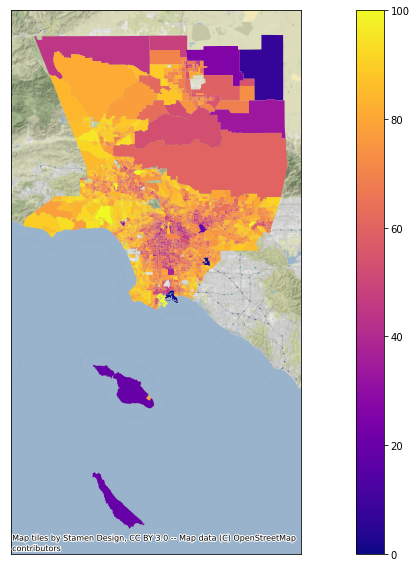

In [28]:
#create heat map
fig, ax = plt.subplots(1,1,figsize=(20,10))
census_tracts.to_crs('EPSG:3857').plot(column = 'broadband_index', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'vertical'})
ax.set_xticks([])
ax.set_yticks([])
ctx.add_basemap(ax, zoom=12)
plt.show()

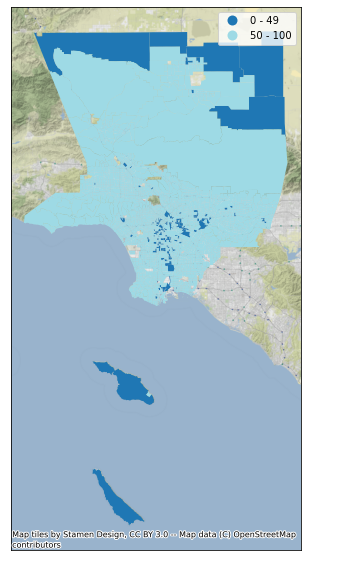

In [34]:
#map shows those with a broadband index below 50 
fig, ax = plt.subplots(1,1,figsize=(20,10))

census_tracts.to_crs('EPSG:3857').plot(column = 'broadband_index_category', ax=ax, cmap = 'tab20', legend=True )
ax.set_xticks([])
ax.set_yticks([])
ctx.add_basemap(ax, zoom=12)
plt.show()

In [35]:
# # without basemap
# fig, ax = plt.subplots(1,1,figsize=(20,10))

# census_tracts.plot('broadband_index', ax=ax, cmap='plasma', legend=True, 
#                legend_kwds={'orientation': 'vertical'})
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_facecolor('k')